# Problem statement


#### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.


#### once they fill up the form they classified as lead.Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.Now, although X Education gets a lot of leads, its lead conversion rate is very poor.so X Education want to select the most promising leads, i.e. the leads that are most likely to convert into paying customers.


#### Here the main goal is :
   - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance    

In [1]:
## Import libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

#### Data Reading and Data understanding

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- data contains 9240 rows and 37 columns
- here converted is our target variable
- data contains select values in some columns which are missing values

###  Data handling

In [4]:
# checking for missing value percentage
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000


- from the above there are so many missing values in data 
- here replace the select values with nan value then we will know the null values percentage
- then drop the columns having more than 40% of missing values
- there are some less percentage of missing values(less than 2%) so simply drop the rows and for other missing values use imputation technique

In [5]:
# replacing select values with NaN
df=df.replace('Select',np.nan)

In [6]:
# again check the null valu peecentage
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# droping the columns having missing values 40% 
for i in df.columns:
    if df[i].isnull().mean()> 0.40:
     
        df.drop(i,axis=1,inplace=True)
        
        

In [8]:
# lets check the data
df.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [10]:
# use iputation techninque for other columns, for this create a list of columns having morethan 2% missing values
missing_list=['Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City']


- from the above those columns are object type so simply replace missing values with mode


In [11]:
# let's fill the nan values
for i in missing_list:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [12]:
# check the data for missing values 
df.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [13]:
# Now drop the rows having missing values less than 2%
df.dropna(inplace=True)
df.isnull().mean()

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

- now there are no missing values in the data


In [14]:
#lets look the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


-the above data contains some boolean columns so encode them . means replace yes with 1 and No with zero 

In [15]:
df=df.replace('Yes',1)
df=df.replace('No',0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

__check the imbalance in the data__
#### Data imbalance usually reflects an unequal distribution of classes within a dataset.Here we need to check data imabalance in dependent variable.Here dependent variable is Converted  

In [16]:
df['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

In [17]:
#convertion rate
print("Conversion rate is ", (sum(df['Converted'])/len(df['Converted'].index))*100)

Conversion rate is  37.85541106458012


- from the above we can say that data is not that much of  imbalanced so we can consider it

In [18]:
#lets check the statistical summary
df.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,23348.029512,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


- from the above we can tell that some numeric columns have outliers

# Exploratory data analysis

## Check for outliers using univariate analysis 
The purpose of univariate analysis is to understand the distribution of values for a single variable.Here boxplot can be used 
for handling outliers.
outliers present in numerical features only,so we take all the columns which are float64 type and some int64 which may contains outliers

In [19]:
df_nume=[i for i in df if df[i].dtype!='O']
print(len(df_nume))

19


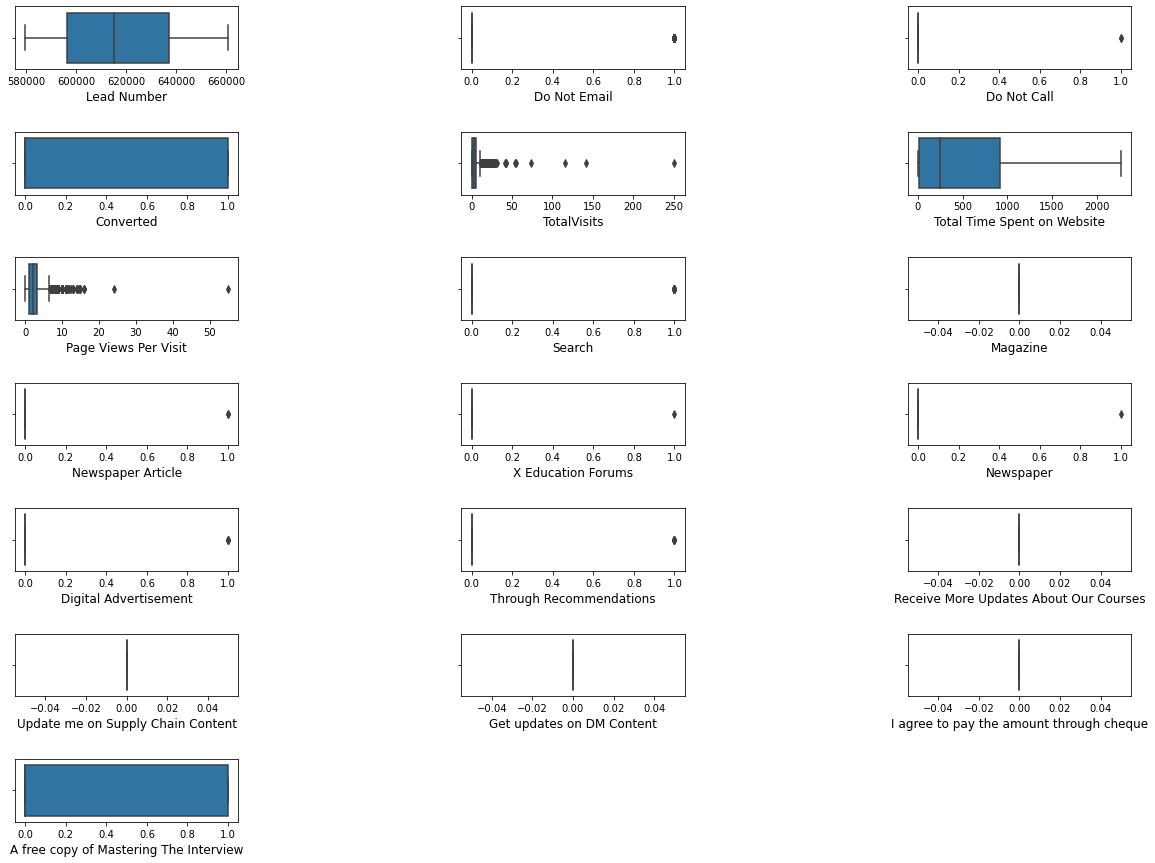

In [20]:
#Box plot for numerical variables
i=1
plt.figure(figsize=(20,15))
for col in df_nume: 
    plt.subplot(7,3,i)
    sns.boxplot(df[col])
    plt.xlabel(col,size=12)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()

- from the above outliers present in page views per visit and Total visits.So here we need to cap them to 95 percentile

In [21]:
#create a outlier_list and cap them with 95 percentile
outlier_list=['TotalVisits','Page Views Per Visit']

In [22]:
for i in outlier_list:
    q=df[i].quantile(0.95)
    df[i][df[i] >= q] = q

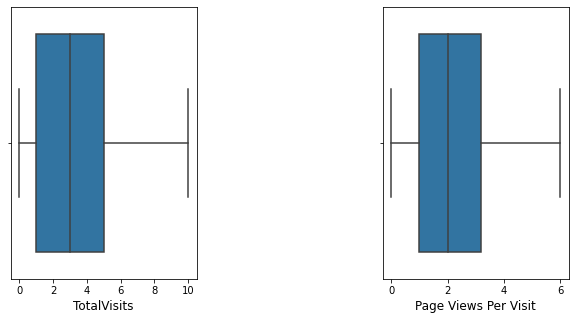

In [23]:
#check for outlier
i=1
plt.figure(figsize=(10,5))
for col in outlier_list: 
    plt.subplot(1,2,i)
    sns.boxplot(df[col])
    plt.xlabel(col,size=12)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()

- Now there no outliers in the data


### Bivariate analysis
Bivariate analysis gives the relation ship between two variables.Here we will do analysis between the other variables with 
dependent variable.

In [24]:
# create the list categorical variables 
df_cat=[i for i in df if df[i].dtype=='O']
df_cat

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'Last Notable Activity']

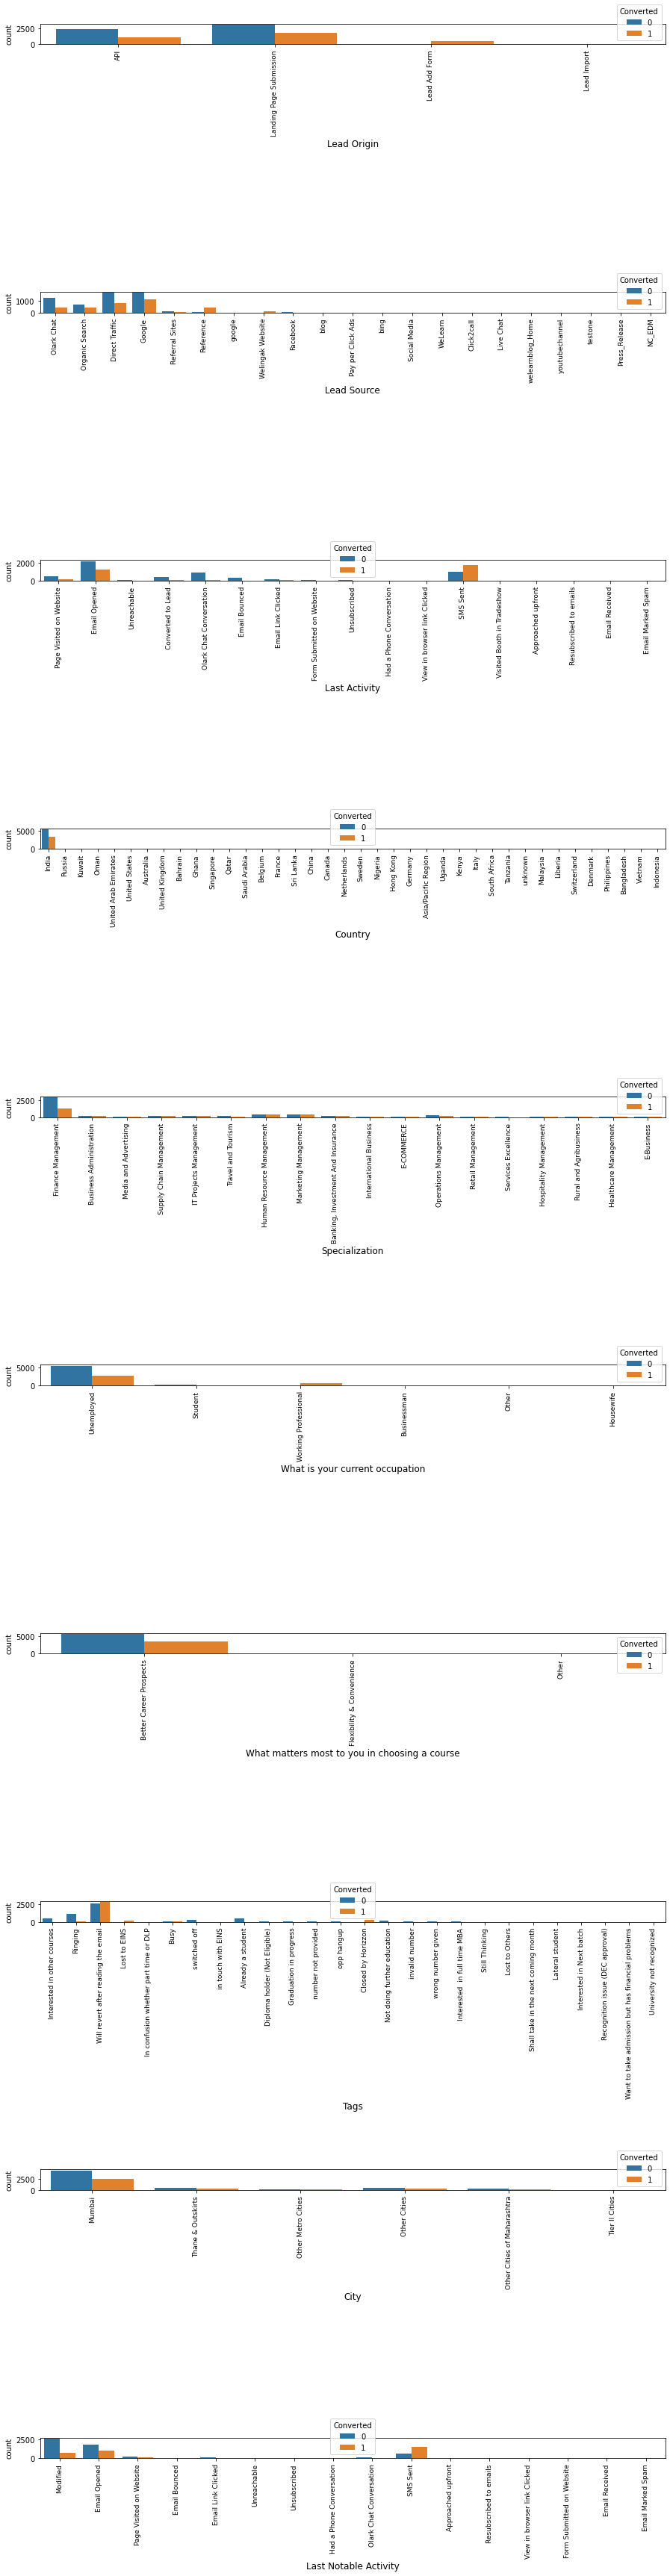

In [25]:
# Here we using countplot
i=1
plt.figure(figsize=(15,60))
for col in df_cat:
    if col !='Prospect ID':
        plt.subplot(10,1,i)
        sns.countplot(x=df[col], hue='Converted' , data= df)
        plt.xlabel(col,size=12)
        plt.xticks(rotation=90,size=9)
        i=i+1
    
plt.subplots_adjust(hspace=12,wspace=1) 
plt.show()

___from the results we can tell that___ 
- in lead origin API and Landing Page Submission have low convertions and lead and form has large no.of conversions
- in lead Source Referral Sites and references have large no.of convertions
- in lead activity view in browser link clicked has large no.of  conversions
- in country only india showing less no.of convertions
- in specialization Finance Management showing low convertions
- in occupation Working Professional showing high convertions
- in choosing  course Better career Prospects showing low convertions 
- in city mumbai showing low convertions
- last notable activity Sms sent showing large no.of convertions
above convertion rate = probability of lead converting(converted=1) *100
-above some columns only some categories showing change in rate so change remaining all into one name as others so that we can get a better model and some in some columns only one category showing change in rate but that is also low convertion rate but here we need to focus on high convertion rate so drop them 


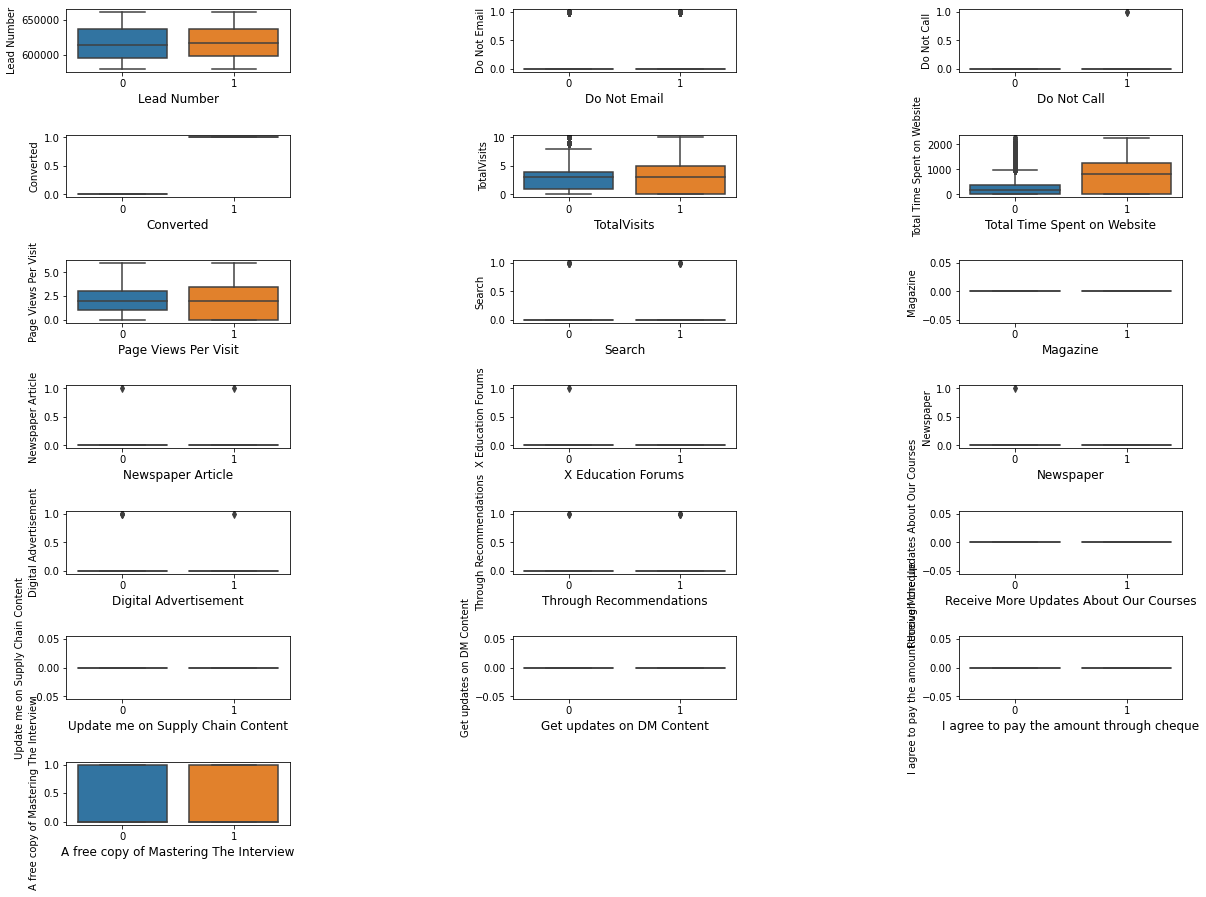

In [26]:
# do the bivariate for numeric columns
i=1
plt.figure(figsize=(20,15))
for col in df_nume: 
    plt.subplot(7,3,i)
    sns.boxplot(y=df[col],x='Converted', data=df)
    plt.xlabel(col,size=12)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()

- from the above Total visits,Total time spent on website and page viwers per vist have high conevrtion rate
- from the above some columns having mean is zero means we cannot made infrences so drop them 
- some columns showing equal convertions and zero convertions and some having only one value  from which we cannot made infrences so drop them because here we need to focus on those who converted


In [27]:
#check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

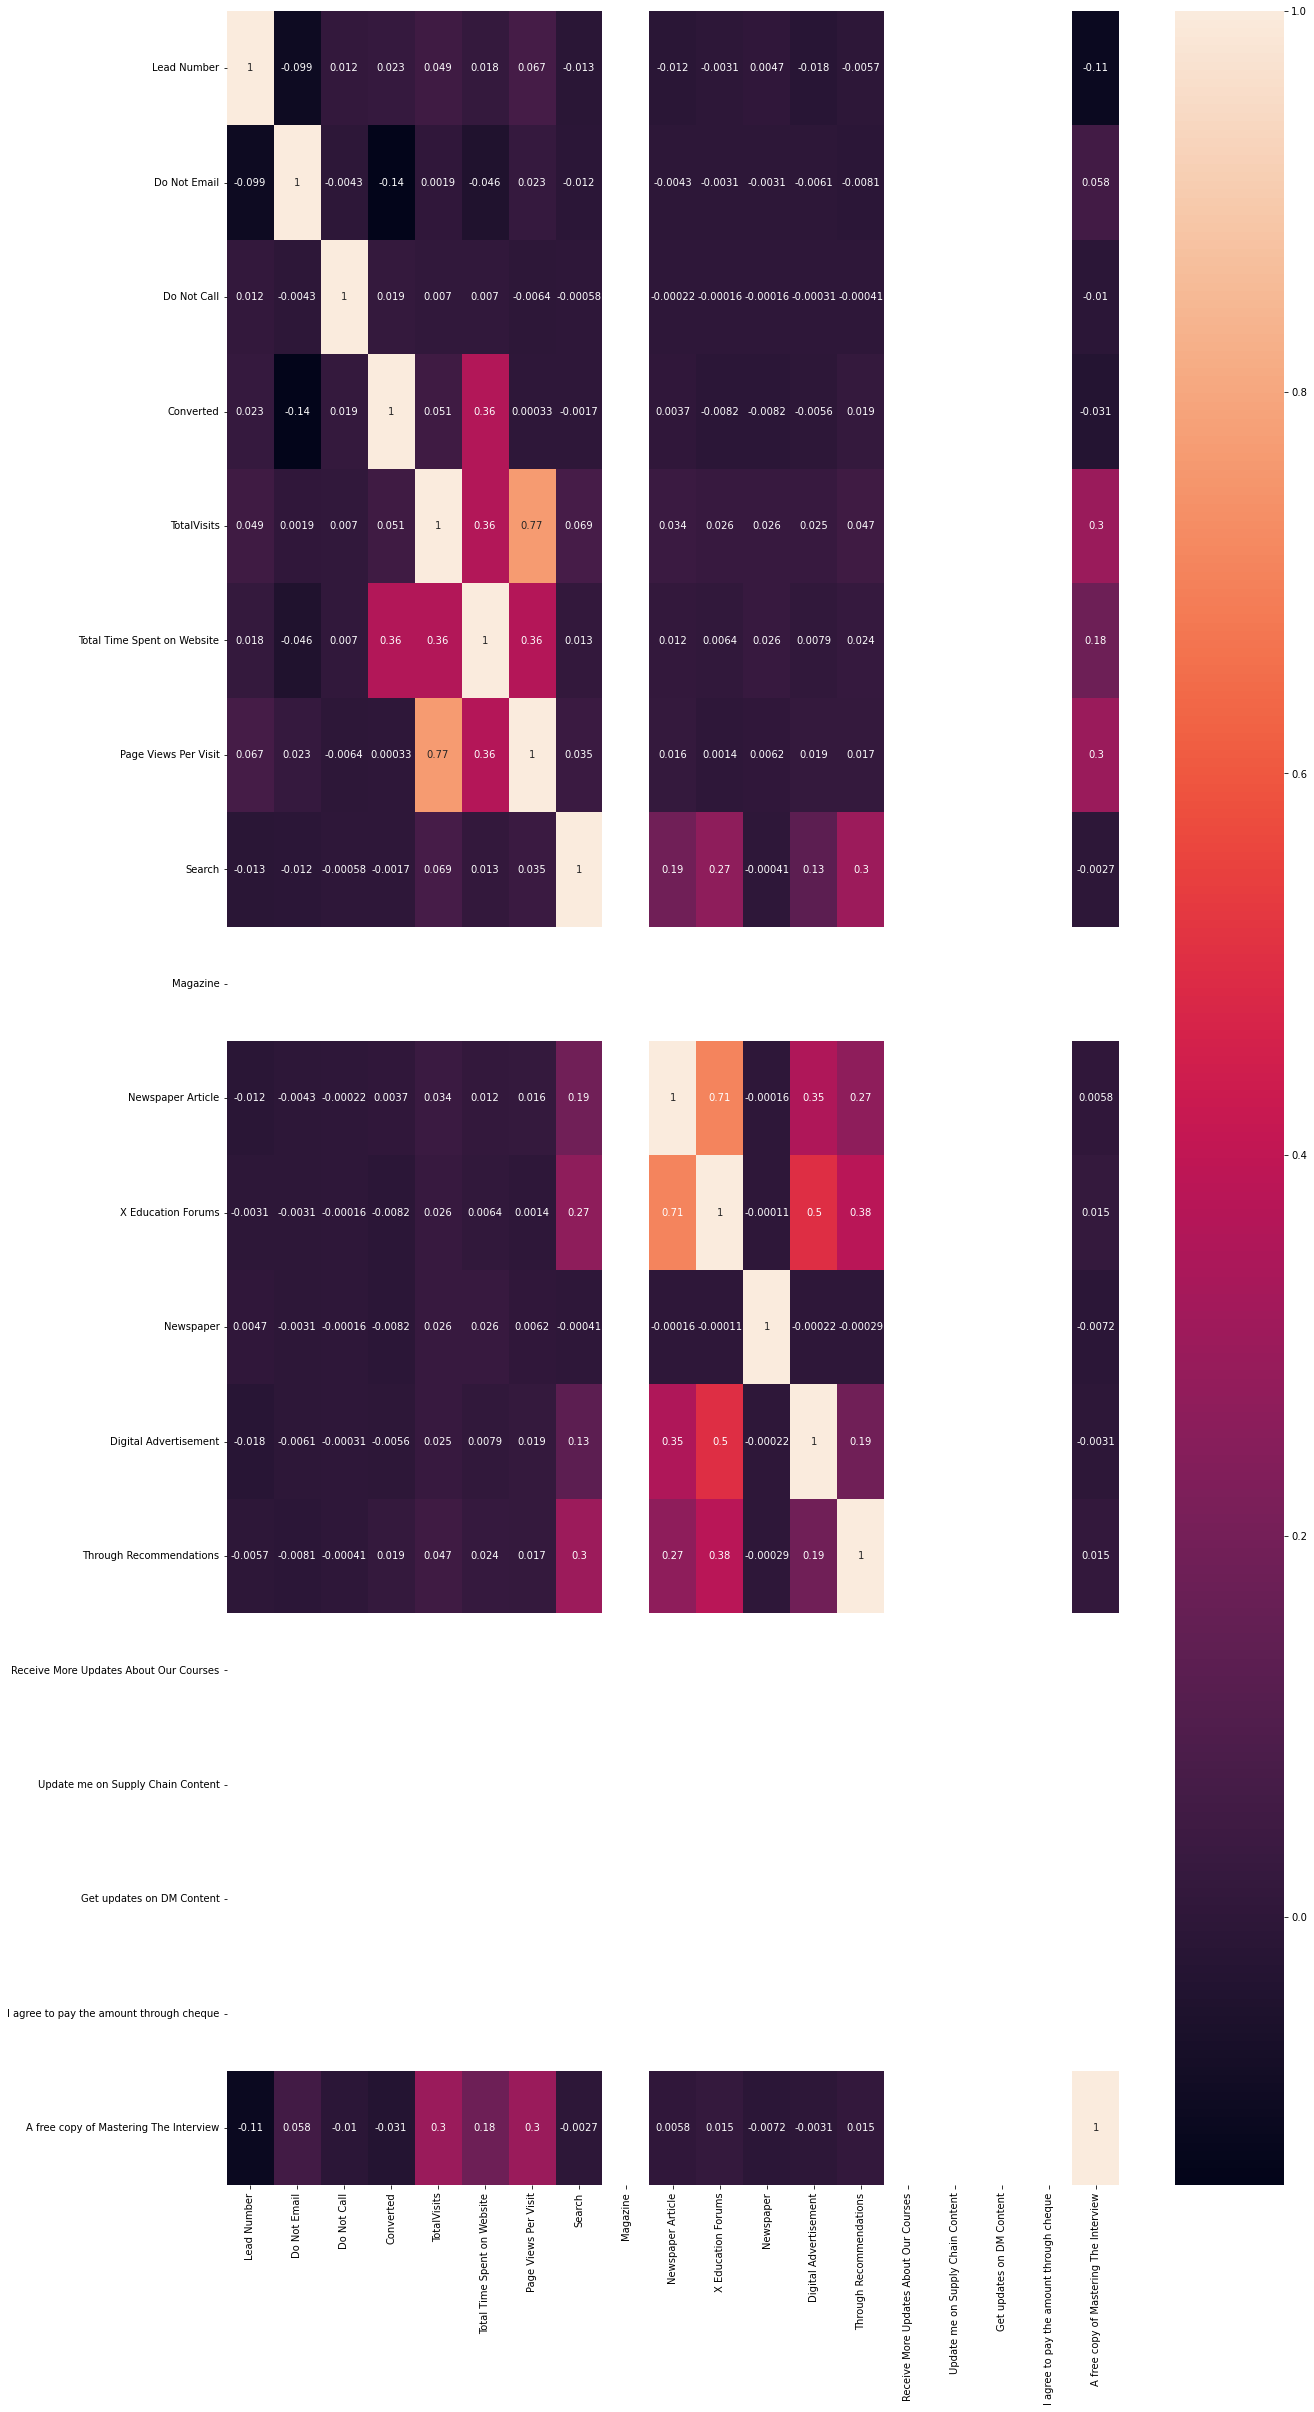

In [28]:
#check for the correlation between the variables

plt.figure(figsize= (20,40))
sns.heatmap(df.corr(),annot=True)
plt.show()

- from the heat map we can see that there are some variabels are highly correlated so drop them and some of them are not related 

In [29]:
#drop the unwanted data before generating model
df=df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
            'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','Country','Do Not Email','Do Not Call','A free copy of Mastering The Interview'],1)

In [30]:
#check the data again
df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,Modified


### Logistic Regression model development
Here we develop the multiple logistic regression model beacuse target varible has a relationship with multiple independent features.Here we know the target variable so it is a supervised ml model

#### Data preparation
here we create dummy variable for categorical variables


___before creating dummies lets do bivariate analysis for remaing categorical columns___

In [31]:
# Here we using countplot
df_cat_new=[i for i in df if df[i].dtype=='O']
df_cat_new

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

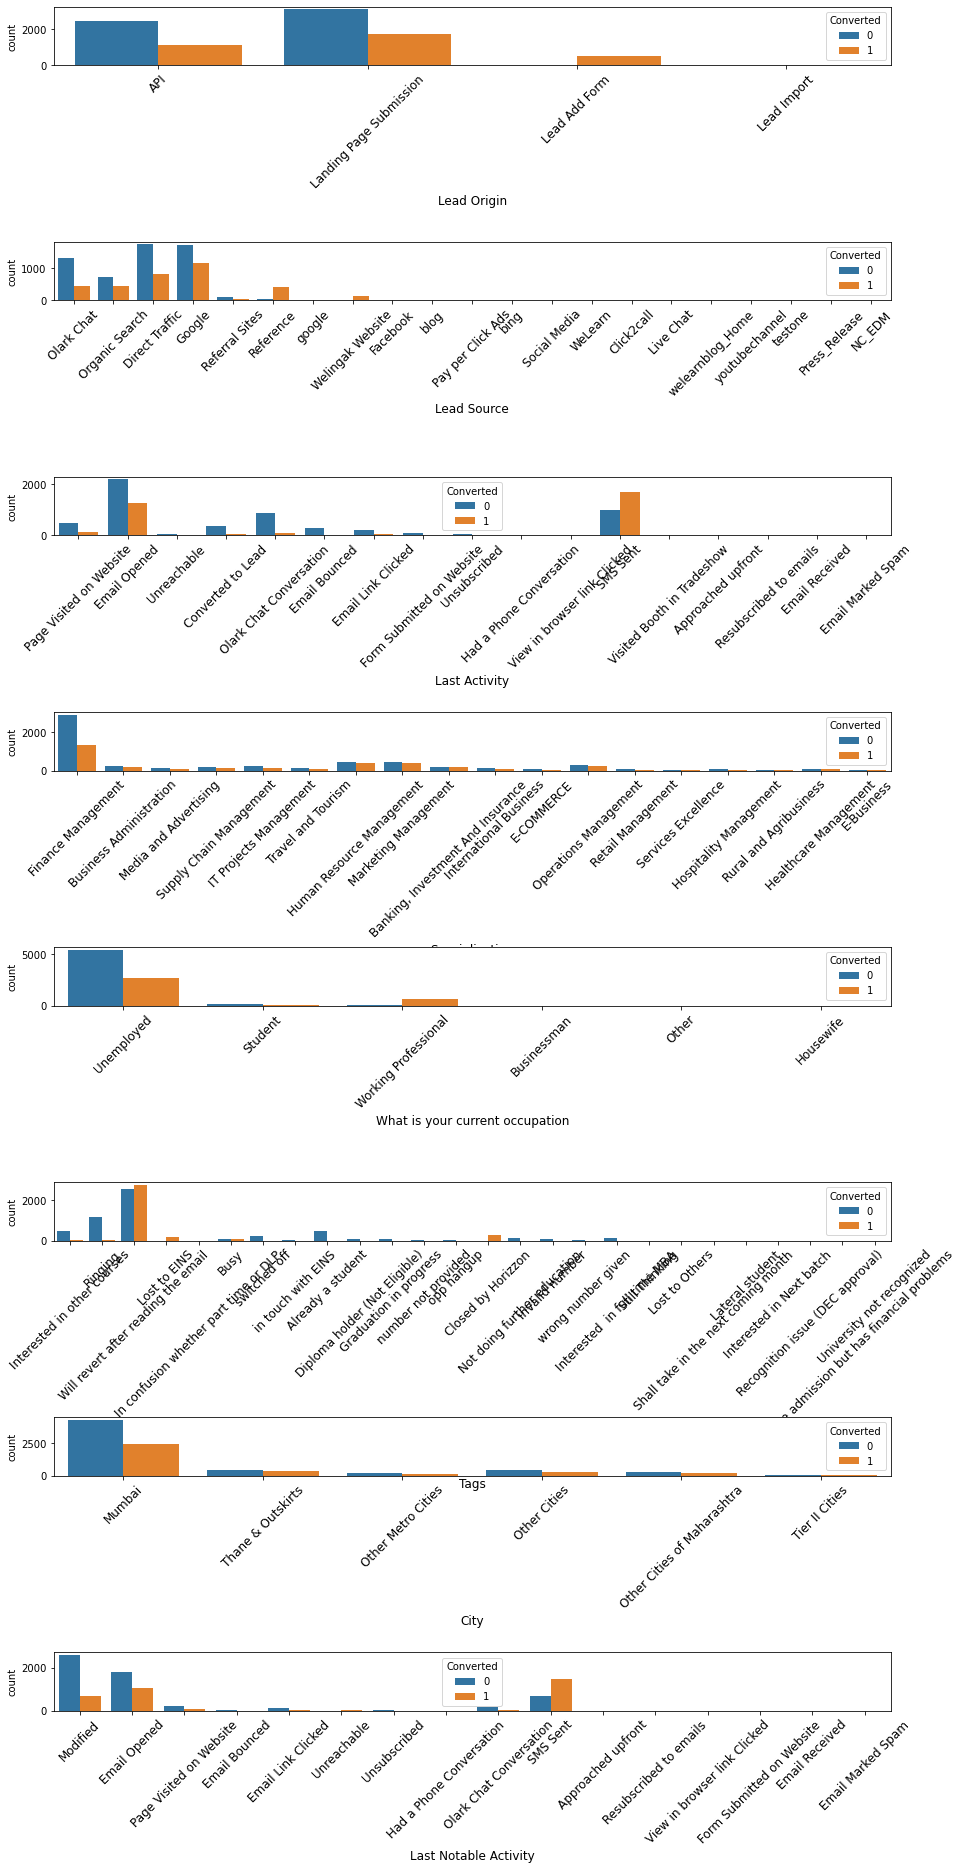

In [32]:
i=1
plt.figure(figsize=(15,40))
for col in df_cat_new:
    if col !='Prospect ID':
        plt.subplot(10,1,i)
        sns.countplot(x=df[col], hue='Converted' , data= df)
        plt.xlabel(col,size=12)
        plt.xticks(rotation=45,size=12)
        i=i+1
    
plt.subplots_adjust(hspace=3,wspace=1) 
plt.show()

- from the above we can say that in lead source some categories have very low number of values so we consider all them as other leading sources


In [33]:
# lets see the variables
df['Lead Source'].value_counts(normalize=True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

In [34]:
#let's replace the categories whose values are less than 0.1% as other_sources
df['Lead Source']=df['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel',
                                            'testone','Pay per Click Ads','welearnblog_Home','WeLearn','NC_EDM','blog'],'other_sources')
df['Lead Source']=df['Lead Source'].replace('google','Google')

In [35]:
df['Lead Source'].value_counts(normalize=True)*100

Google              31.661891
Direct Traffic      28.025127
Olark Chat          19.318933
Organic Search      12.717655
Reference            4.882081
Welingak Website     1.421644
Referral Sites       1.377562
Facebook             0.341635
other_sources        0.253471
Name: Lead Source, dtype: float64

In [36]:
df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: What is your current occupation, dtype: float64

In [37]:
df['What is your current occupation']=df['What is your current occupation'].replace(['Other','Housewife','Businessman'],'other_occupation')

In [38]:
df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
other_occupation         0.352656
Name: What is your current occupation, dtype: float64

In [39]:
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: Last Activity, dtype: float64

In [40]:
df['Last Activity']=df['Last Activity'].replace(['Unsubscribed','Had a Phone Conversation','View in browser link Clicked',
                                                'Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow'
                                                ,'Resubscribed to emails'],'other_activity')

In [41]:
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 37.822350
SMS Sent                     29.931673
Olark Chat Conversation      10.711924
Page Visited on Website       7.053119
Converted to Lead             4.716773
Email Bounced                 3.438395
Email Link Clicked            2.942473
Form Submitted on Website     1.278378
other_activity                1.113070
Unreachable                   0.991845
Name: Last Activity, dtype: float64

In [42]:
df['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  58.882521
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0.363676
number not provided                                   0

In [43]:
df['Tags']=df['Tags'].replace(['Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS'
                   ,'Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP'
                   ,'Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)']
                  ,'other_tags')

In [44]:
df['Tags'].value_counts(normalize=True)*100

Will revert after reading the email    58.882521
Ringing                                13.081331
Interested in other courses             5.609434
Already a student                       5.124532
Closed by Horizzon                      3.317170
switched off                            2.644920
other_tags                              2.391448
Busy                                    2.038792
Lost to EINS                            1.895526
Not doing further education             1.597972
Interested  in full time MBA            1.278378
Graduation in progress                  1.223275
invalid number                          0.914701
Name: Tags, dtype: float64

In [45]:
df['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

In [46]:
df['Last Notable Activity']=df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                'Had a Phone Conversation','Email Marked Spam',
                                                                'Approached upfront','Resubscribed to emails'
                                                                ,'View in browser link Clicked','Form Submitted on Website',
                                                                'Email Received'],'other_notable_activity')

In [47]:
df['Last Notable Activity'].value_counts(normalize=True)*100

Modified                   36.003967
Email Opened               31.110866
SMS Sent                   23.716112
Page Visited on Website     3.504518
Olark Chat Conversation     2.016751
Email Link Clicked          1.906546
other_notable_activity      1.741239
Name: Last Notable Activity, dtype: float64

In [48]:
# lets create dummies
cat=df.select_dtypes(include = ['object'])

In [49]:
cat.head()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,Modified


- from the above we don't need prospect id dummies drop the column

In [50]:
cat=cat.drop(['Prospect ID'],1)

In [51]:
cat.head()

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,Modified
1,API,Organic Search,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,Modified


In [52]:
cat_dummies = pd.get_dummies(cat, drop_first = True)

In [53]:
# Let's drop all the categorical columns from the df datafrme
df.drop(columns = list(cat.columns), inplace = True)

In [54]:
df  = pd.concat([df, cat_dummies], axis  = 1)

In [55]:
df.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


- from the above we need to drop prospet id because it's no use in model building

In [56]:
df=df.drop('Prospect ID',1)


In [57]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0



### Split the train and test data

In [58]:
# import the library for model building

from sklearn.model_selection import train_test_split

## Putting response variable to y

y=df['Converted']

y.head()

X= df.drop('Converted', axis=1)


In [59]:
#split the data

X_train, X_test, y_train, y_test = train_test_split (X, y, train_size= 0.7, test_size= 0.3, random_state = 100)

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6351 non-null   float64
 1   Total Time Spent on Website                           6351 non-null   int64  
 2   Page Views Per Visit                                  6351 non-null   float64
 3   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 5   Lead Origin_Lead Import                               6351 non-null   uint8  
 6   Lead Source_Facebook                                  6351 non-null   uint8  
 7   Lead Source_Google                                    6351 non-null   uint8  
 8   Lead Source_Olark Chat                                6

- from the above train data contains __70%__ and test data contains __30%__

### Rescaling the data

In [61]:
## Scaling Numeric Columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols= X_train.select_dtypes(include= ['float64','int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Model building uisng Stat model & RFE

In [62]:
# let's import the libraries  for model building

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe= rfe.fit(X_train, y_train)
import statsmodels.api as sm

In [63]:
import statsmodels.api as sm

In [64]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True])

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_other_sources', False, 34),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 25),
 ('Last Activity_Email Opened', False, 26),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 30),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_other_activity', True, 1),
 ('Speciali

In [66]:
col= X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_other_activity',
       'Specialization_Finance Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_other_tags', 'Tags_switched off',
       'Last No

In [67]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_other_sources',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       '

In [68]:
## Building Model

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1623.2
Date:                Tue, 18 Oct 2022   Deviance:                       3246.4
Time:                        23:13:58   Pearson chi2:                 1.16e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5604
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7652      0.457     -6.055      0.000      -3.660      -1.870
Total Time Spent on Website                              1.1867      0.055     21.660      0.000       1.079       1.294
Lead Origin_Landing Page Submission                     -0.8308      0.139     -5.975      0.000      -1.103      -0.558
Lead Origin_Lead Add Form                                1.4609      1.190      1.228      0.219      -0.871       3.792
Lead Origin_Lead Import                                  1.6798      0.620      2.709      0.007       0.464       2.895
Lead Source_Olark Chat                                   0.7351      0.151      4.871      0.000       0.439       1.031
Lead Source_Reference                                    1.5943      1.227      1.299      0.194      -0.811       4.000
Lead Source_Welingak Website                             3.1430      1.394      2.255      0.024       0.411       5.875
Last Activity_Email Bounced                             -1.8844      0.504     -3.741      0.000      -2.872      -0.897
Last Activity_Olark Chat Conversation                   -0.6617      0.241     -2.743      0.006      -1.135      -0.189
Last Activity_SMS Sent                                   0.7605      0.198      3.841      0.000       0.372       1.149
Last Activity_Unreachable                                0.7574      0.527      1.436      0.151      -0.276       1.791
Last Activity_other_activity                             0.7142      0.575      1.243      0.214      -0.412       1.841
Specialization_Finance Management                       -0.7909      0.123     -6.440      0.000      -1.032      -0.550
Specialization_International Business                   -0.6733      0.295     -2.282      0.022      -1.252      -0.095
Specialization_Travel and Tourism                       -0.4165      0.338     -1.232      0.218      -1.079       0.246
What is your current occupation_Unemployed              -1.6546      0.330     -5.019      0.000      -2.301      -1.008
What is your current occupation_Working Professional     1.1830      0.417      2.838      0.005       0.366       2.000
Tags_Busy                                                3.1402      0.402      7.814      0.000       2.353       3.928
Tags_Closed by Horizzon                                  8.9564      0.796     11.251      0.000       7.396      10.517
Tags_Graduation in progress                              1.8645      0.599      3.114      0.002       0.691       3.038
Tags_Interested  in full time MBA                        0.1514      0.853      0.177      0.859      -1.521       1.824
Tags_Lost to EINS                                        8

-from the above some of them having high p value so just drop them



In [69]:
#let's use the variance influence factor
## Checking VIF to see if there is any correaltion between variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:

vif=pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.66
5,Lead Source_Reference,48.17
15,What is your current occupation_Unemployed,19.12
6,Lead Source_Welingak Website,15.50
31,Last Notable Activity_SMS Sent,9.68
24,Tags_Will revert after reading the email,7.05
29,Last Notable Activity_Modified,7.01
9,Last Activity_SMS Sent,6.80
28,Last Notable Activity_Email Opened,5.24
1,Lead Origin_Landing Page Submission,4.50


In [71]:
col = col.drop(['Lead Origin_Lead Add Form'],1)

In [72]:
# again build the second model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1624.1
Date:                Tue, 18 Oct 2022   Deviance:                       3248.3
Time:                        23:14:00   Pearson chi2:                 1.16e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5603
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7454      0.456     -6.022      0.000      -3.639      -1.852
Total Time Spent on Website                              1.1846      0.055     21.639      0.000       1.077       1.292
Lead Origin_Landing Page Submission                     -0.8440      0.139     -6.086      0.000      -1.116      -0.572
Lead Origin_Lead Import                                  1.6671      0.620      2.688      0.007       0.451       2.883
Lead Source_Olark Chat                                   0.7264      0.151      4.824      0.000       0.431       1.022
Lead Source_Reference                                    3.0415      0.336      9.060      0.000       2.383       3.699
Lead Source_Welingak Website                             4.5923      0.739      6.212      0.000       3.143       6.041
Last Activity_Email Bounced                             -1.8818      0.504     -3.737      0.000      -2.869      -0.895
Last Activity_Olark Chat Conversation                   -0.6636      0.241     -2.751      0.006      -1.136      -0.191
Last Activity_SMS Sent                                   0.7603      0.198      3.840      0.000       0.372       1.148
Last Activity_Unreachable                                0.7604      0.527      1.442      0.149      -0.273       1.794
Last Activity_other_activity                             0.7162      0.575      1.246      0.213      -0.410       1.842
Specialization_Finance Management                       -0.7968      0.123     -6.494      0.000      -1.037      -0.556
Specialization_International Business                   -0.6772      0.295     -2.295      0.022      -1.256      -0.099
Specialization_Travel and Tourism                       -0.4181      0.338     -1.237      0.216      -1.081       0.244
What is your current occupation_Unemployed              -1.6541      0.330     -5.017      0.000      -2.300      -1.008
What is your current occupation_Working Professional     1.1814      0.417      2.833      0.005       0.364       1.999
Tags_Busy                                                3.1387      0.402      7.810      0.000       2.351       3.926
Tags_Closed by Horizzon                                  8.9581      0.796     11.253      0.000       7.398      10.518
Tags_Graduation in progress                              1.8645      0.599      3.114      0.002       0.691       3.038
Tags_Interested  in full time MBA                        0.1503      0.854      0.176      0.860      -1.523       1.823
Tags_Lost to EINS                                        8.8232      0.804     10.977      0.000       7.248      10.399
Tags_Not doing further education                        -0

- still there are some have high p values so check the vif for multicorrelation 

In [73]:
## Checking VIF to see if there is any correaltion between variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif=pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,19.11
30,Last Notable Activity_SMS Sent,9.67
23,Tags_Will revert after reading the email,7.05
28,Last Notable Activity_Modified,7.01
8,Last Activity_SMS Sent,6.80
27,Last Notable Activity_Email Opened,5.24
1,Lead Origin_Landing Page Submission,4.49
11,Specialization_Finance Management,3.09
15,What is your current occupation_Working Profes...,2.62
22,Tags_Ringing,2.43


- there are two variable have hifh vif so we need to drop them


In [74]:
col= col.drop(['What is your current occupation_Unemployed'],1)

In [75]:
#lets check the vif again

In [76]:
vif=pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,19.11
30,Last Notable Activity_SMS Sent,9.67
23,Tags_Will revert after reading the email,7.05
28,Last Notable Activity_Modified,7.01
8,Last Activity_SMS Sent,6.80
27,Last Notable Activity_Email Opened,5.24
1,Lead Origin_Landing Page Submission,4.49
11,Specialization_Finance Management,3.09
15,What is your current occupation_Working Profes...,2.62
22,Tags_Ringing,2.43


In [77]:
# again build the third model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1624.1
Date:                Tue, 18 Oct 2022   Deviance:                       3248.3
Time:                        23:14:11   Pearson chi2:                 1.16e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5603
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7454      0.456     -6.022      0.000      -3.639      -1.852
Total Time Spent on Website                              1.1846      0.055     21.639      0.000       1.077       1.292
Lead Origin_Landing Page Submission                     -0.8440      0.139     -6.086      0.000      -1.116      -0.572
Lead Origin_Lead Import                                  1.6671      0.620      2.688      0.007       0.451       2.883
Lead Source_Olark Chat                                   0.7264      0.151      4.824      0.000       0.431       1.022
Lead Source_Reference                                    3.0415      0.336      9.060      0.000       2.383       3.699
Lead Source_Welingak Website                             4.5923      0.739      6.212      0.000       3.143       6.041
Last Activity_Email Bounced                             -1.8818      0.504     -3.737      0.000      -2.869      -0.895
Last Activity_Olark Chat Conversation                   -0.6636      0.241     -2.751      0.006      -1.136      -0.191
Last Activity_SMS Sent                                   0.7603      0.198      3.840      0.000       0.372       1.148
Last Activity_Unreachable                                0.7604      0.527      1.442      0.149      -0.273       1.794
Last Activity_other_activity                             0.7162      0.575      1.246      0.213      -0.410       1.842
Specialization_Finance Management                       -0.7968      0.123     -6.494      0.000      -1.037      -0.556
Specialization_International Business                   -0.6772      0.295     -2.295      0.022      -1.256      -0.099
Specialization_Travel and Tourism                       -0.4181      0.338     -1.237      0.216      -1.081       0.244
What is your current occupation_Unemployed              -1.6541      0.330     -5.017      0.000      -2.300      -1.008
What is your current occupation_Working Professional     1.1814      0.417      2.833      0.005       0.364       1.999
Tags_Busy                                                3.1387      0.402      7.810      0.000       2.351       3.926
Tags_Closed by Horizzon                                  8.9581      0.796     11.253      0.000       7.398      10.518
Tags_Graduation in progress                              1.8645      0.599      3.114      0.002       0.691       3.038
Tags_Interested  in full time MBA                        0.1503      0.854      0.176      0.860      -1.523       1.823
Tags_Lost to EINS                                        8.8232      0.804     10.977      0.000       7.248      10.399
Tags_Not doing further education                        -0

In [78]:
#from the above vif is greater than 5 for some variable so drop them

col= col.drop(['Last Notable Activity_SMS Sent'],1)

In [79]:
#again check the vif and biuld a model

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1658.1
Date:                Tue, 18 Oct 2022   Deviance:                       3316.1
Time:                        23:14:12   Pearson chi2:                 1.03e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5555
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7768      0.427     -4.164      0.000      -2.613      -0.940
Total Time Spent on Website                              1.1942      0.055     21.890      0.000       1.087       1.301
Lead Origin_Landing Page Submission                     -0.8196      0.138     -5.954      0.000      -1.089      -0.550
Lead Origin_Lead Import                                  1.5394      0.610      2.522      0.012       0.343       2.736
Lead Source_Olark Chat                                   0.7214      0.148      4.869      0.000       0.431       1.012
Lead Source_Reference                                    3.0474      0.338      9.019      0.000       2.385       3.710
Lead Source_Welingak Website                             4.5460      0.740      6.141      0.000       3.095       5.997
Last Activity_Email Bounced                             -1.4244      0.506     -2.813      0.005      -2.417      -0.432
Last Activity_Olark Chat Conversation                   -0.1691      0.240     -0.706      0.480      -0.639       0.300
Last Activity_SMS Sent                                   1.8844      0.144     13.107      0.000       1.603       2.166
Last Activity_Unreachable                                1.2098      0.528      2.289      0.022       0.174       2.245
Last Activity_other_activity                             1.1667      0.576      2.026      0.043       0.038       2.295
Specialization_Finance Management                       -0.7596      0.121     -6.265      0.000      -0.997      -0.522
Specialization_International Business                   -0.6344      0.289     -2.197      0.028      -1.200      -0.069
Specialization_Travel and Tourism                       -0.3843      0.333     -1.155      0.248      -1.036       0.268
What is your current occupation_Unemployed              -1.7136      0.331     -5.172      0.000      -2.363      -1.064
What is your current occupation_Working Professional     1.1715      0.420      2.787      0.005       0.348       1.995
Tags_Busy                                                3.2334      0.396      8.165      0.000       2.457       4.010
Tags_Closed by Horizzon                                  9.2118      0.802     11.491      0.000       7.641      10.783
Tags_Graduation in progress                              2.0028      0.591      3.389      0.001       0.845       3.161
Tags_Interested  in full time MBA                        0.2008      0.860      0.234      0.815      -1.484       1.886
Tags_Lost to EINS                                        8.9739      0.812     11.054      0.000       7.383      10.565
Tags_Not doing further education                        -0

In [81]:
vif=pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,16.75
23,Tags_Will revert after reading the email,7.02
1,Lead Origin_Landing Page Submission,4.42
27,Last Notable Activity_Email Opened,3.78
28,Last Notable Activity_Modified,3.64
8,Last Activity_SMS Sent,3.37
11,Specialization_Finance Management,3.06
22,Tags_Ringing,2.41
15,What is your current occupation_Working Profes...,2.37
3,Lead Source_Olark Chat,2.32


- from the above  some are having high p and vif value so drop them 


In [82]:

col= col.drop(['Tags_Will revert after reading the email'],1)

In [83]:
#again check the vif
vif=pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,12.62
1,Lead Origin_Landing Page Submission,4.37
26,Last Notable Activity_Email Opened,3.70
27,Last Notable Activity_Modified,3.64
8,Last Activity_SMS Sent,3.22
11,Specialization_Finance Management,3.04
3,Lead Source_Olark Chat,2.28
7,Last Activity_Olark Chat Conversation,2.06
15,What is your current occupation_Working Profes...,1.97
29,Last Notable Activity_other_notable_activity,1.88


In [84]:
# again check the model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1825.8
Date:                Tue, 18 Oct 2022   Deviance:                       3651.6
Time:                        23:14:14   Pearson chi2:                 1.06e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5314
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2984      0.284      1.052      0.293      -0.258       0.854
Total Time Spent on Website                              1.1662      0.051     22.951      0.000       1.067       1.266
Lead Origin_Landing Page Submission                     -0.7135      0.127     -5.622      0.000      -0.962      -0.465
Lead Origin_Lead Import                                  1.7069      0.584      2.921      0.003       0.561       2.852
Lead Source_Olark Chat                                   0.8112      0.142      5.713      0.000       0.533       1.089
Lead Source_Reference                                    3.1814      0.319      9.974      0.000       2.556       3.807
Lead Source_Welingak Website                             4.8043      0.741      6.484      0.000       3.352       6.256
Last Activity_Email Bounced                             -1.2376      0.496     -2.495      0.013      -2.210      -0.265
Last Activity_Olark Chat Conversation                   -0.2112      0.230     -0.918      0.359      -0.662       0.240
Last Activity_SMS Sent                                   2.1398      0.136     15.684      0.000       1.872       2.407
Last Activity_Unreachable                                1.4571      0.504      2.890      0.004       0.469       2.445
Last Activity_other_activity                             1.2387      0.513      2.414      0.016       0.233       2.245
Specialization_Finance Management                       -0.6929      0.112     -6.173      0.000      -0.913      -0.473
Specialization_International Business                   -0.5383      0.277     -1.944      0.052      -1.081       0.004
Specialization_Travel and Tourism                       -0.3655      0.307     -1.190      0.234      -0.967       0.236
What is your current occupation_Unemployed              -0.3552      0.231     -1.541      0.123      -0.807       0.097
What is your current occupation_Working Professional     2.1953      0.321      6.829      0.000       1.565       2.825
Tags_Busy                                               -0.4619      0.242     -1.912      0.056      -0.935       0.011
Tags_Closed by Horizzon                                  5.7160      0.735      7.779      0.000       4.276       7.156
Tags_Graduation in progress                             -1.4618      0.504     -2.901      0.004      -2.449      -0.474
Tags_Interested  in full time MBA                       -2.9926      0.767     -3.900      0.000      -4.497      -1.489
Tags_Lost to EINS                                        5.4393      0.745      7.296      0.000       3.978       6.900
Tags_Not doing further education                        -4

In [85]:
# now drop the columns with high p value
col= col.drop(['Tags_invalid number','Last Notable Activity_Email Opened','Last Notable Activity_other_notable_activity'],1)

In [86]:
# again check the model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1859.4
Date:                Tue, 18 Oct 2022   Deviance:                       3718.7
Time:                        23:14:15   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5265
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2881      0.256      1.126      0.260      -0.213       0.790
Total Time Spent on Website                              1.1820      0.050     23.435      0.000       1.083       1.281
Lead Origin_Landing Page Submission                     -0.7166      0.126     -5.694      0.000      -0.963      -0.470
Lead Origin_Lead Import                                  1.7495      0.582      3.008      0.003       0.609       2.890
Lead Source_Olark Chat                                   0.8243      0.141      5.860      0.000       0.549       1.100
Lead Source_Reference                                    3.2293      0.317     10.201      0.000       2.609       3.850
Lead Source_Welingak Website                             4.8448      0.740      6.549      0.000       3.395       6.295
Last Activity_Email Bounced                             -1.3114      0.419     -3.128      0.002      -2.133      -0.490
Last Activity_Olark Chat Conversation                   -0.2605      0.225     -1.160      0.246      -0.701       0.180
Last Activity_SMS Sent                                   2.0634      0.099     20.937      0.000       1.870       2.257
Last Activity_Unreachable                                1.4569      0.384      3.796      0.000       0.705       2.209
Last Activity_other_activity                             1.0509      0.373      2.819      0.005       0.320       1.782
Specialization_Finance Management                       -0.6505      0.111     -5.854      0.000      -0.868      -0.433
Specialization_International Business                   -0.4747      0.276     -1.722      0.085      -1.015       0.066
Specialization_Travel and Tourism                       -0.4868      0.296     -1.647      0.100      -1.066       0.092
What is your current occupation_Unemployed              -0.3916      0.230     -1.704      0.088      -0.842       0.059
What is your current occupation_Working Professional     2.1948      0.320      6.862      0.000       1.568       2.822
Tags_Busy                                               -0.3841      0.239     -1.605      0.108      -0.853       0.085
Tags_Closed by Horizzon                                  5.7090      0.733      7.785      0.000       4.272       7.146
Tags_Graduation in progress                             -1.4305      0.502     -2.848      0.004      -2.415      -0.446
Tags_Interested  in full time MBA                       -2.9688      0.770     -3.856      0.000      -4.478      -1.460
Tags_Lost to EINS                                        5.4349      0.744      7.302      0.000       3.976       6.894
Tags_Not doing further education                        -4

In [87]:
#drop the columns with high p value
col= col.drop(['Tags_Busy','Specialization_Travel and Tourism','Last Activity_Olark Chat Conversation'],1)


In [88]:
# again check the model
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1862.7
Date:                Tue, 18 Oct 2022   Deviance:                       3725.3
Time:                        23:14:16   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5260
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2507      0.256      0.981      0.327      -0.250       0.752
Total Time Spent on Website                              1.1846      0.050     23.466      0.000       1.086       1.283
Lead Origin_Landing Page Submission                     -0.7154      0.126     -5.690      0.000      -0.962      -0.469
Lead Origin_Lead Import                                  1.7869      0.582      3.072      0.002       0.647       2.927
Lead Source_Olark Chat                                   0.8118      0.139      5.821      0.000       0.538       1.085
Lead Source_Reference                                    3.2538      0.316     10.312      0.000       2.635       3.872
Lead Source_Welingak Website                             4.8734      0.740      6.586      0.000       3.423       6.324
Last Activity_Email Bounced                             -1.3048      0.419     -3.113      0.002      -2.126      -0.483
Last Activity_SMS Sent                                   2.0622      0.096     21.484      0.000       1.874       2.250
Last Activity_Unreachable                                1.4580      0.383      3.807      0.000       0.707       2.209
Last Activity_other_activity                             1.0657      0.373      2.855      0.004       0.334       1.797
Specialization_Finance Management                       -0.6276      0.110     -5.681      0.000      -0.844      -0.411
Specialization_International Business                   -0.4567      0.276     -1.656      0.098      -0.997       0.084
What is your current occupation_Unemployed              -0.3899      0.230     -1.696      0.090      -0.840       0.061
What is your current occupation_Working Professional     2.2218      0.320      6.944      0.000       1.595       2.849
Tags_Closed by Horizzon                                  5.7557      0.734      7.847      0.000       4.318       7.193
Tags_Graduation in progress                             -1.4281      0.502     -2.847      0.004      -2.411      -0.445
Tags_Interested  in full time MBA                       -2.9675      0.768     -3.863      0.000      -4.473      -1.462
Tags_Lost to EINS                                        5.4720      0.744      7.353      0.000       4.014       6.930
Tags_Not doing further education                        -4.1512      1.300     -3.193      0.001      -6.699      -1.603
Tags_Ringing                                            -4.6829      0.258    -18.139      0.000      -5.189      -4.177
Tags_other_tags                                         -3.0230      0.354     -8.537      0.000      -3.717      -2.329
Tags_switched off                                       -4

In [89]:
col=col.drop(['Specialization_International Business'],1)

In [90]:
#let,s buid the model again
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1864.0
Date:                Tue, 18 Oct 2022   Deviance:                       3728.1
Time:                        23:14:16   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5258
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2230      0.255      0.875      0.382      -0.277       0.723
Total Time Spent on Website                              1.1850      0.050     23.473      0.000       1.086       1.284
Lead Origin_Landing Page Submission                     -0.7108      0.126     -5.660      0.000      -0.957      -0.465
Lead Origin_Lead Import                                  1.7629      0.582      3.027      0.002       0.621       2.904
Lead Source_Olark Chat                                   0.8142      0.139      5.839      0.000       0.541       1.088
Lead Source_Reference                                    3.2585      0.314     10.366      0.000       2.642       3.875
Lead Source_Welingak Website                             4.8781      0.740      6.593      0.000       3.428       6.328
Last Activity_Email Bounced                             -1.3129      0.422     -3.109      0.002      -2.141      -0.485
Last Activity_SMS Sent                                   2.0607      0.096     21.486      0.000       1.873       2.249
Last Activity_Unreachable                                1.4510      0.383      3.786      0.000       0.700       2.202
Last Activity_other_activity                             1.0637      0.373      2.855      0.004       0.333       1.794
Specialization_Finance Management                       -0.6043      0.110     -5.518      0.000      -0.819      -0.390
What is your current occupation_Unemployed              -0.3885      0.230     -1.691      0.091      -0.839       0.062
What is your current occupation_Working Professional     2.2300      0.320      6.975      0.000       1.603       2.857
Tags_Closed by Horizzon                                  5.7334      0.732      7.838      0.000       4.300       7.167
Tags_Graduation in progress                             -1.4166      0.501     -2.828      0.005      -2.398      -0.435
Tags_Interested  in full time MBA                       -3.0161      0.780     -3.868      0.000      -4.544      -1.488
Tags_Lost to EINS                                        5.4767      0.744      7.363      0.000       4.019       6.934
Tags_Not doing further education                        -4.1372      1.300     -3.184      0.001      -6.684      -1.590
Tags_Ringing                                            -4.6807      0.258    -18.110      0.000      -5.187      -4.174
Tags_other_tags                                         -3.0178      0.353     -8.543      0.000      -3.710      -2.325
Tags_switched off                                       -4.3805      0.545     -8.041      0.000      -5.448      -3.313
Last Notable Activity_Modified                          -1

In [91]:
#let's start the predictions on the data

In [92]:
## Moving to derive the probabilities, Lead Score, Predictions on Train Data.

y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

3009    0.158346
1012    0.306835
9226    0.004250
4750    0.958176
7987    0.998668
1281    0.841085
2880    0.074124
4971    0.984498
7536    0.914586
1248    0.023498
dtype: float64

In [93]:
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15834622, 0.30683478, 0.0042498 , 0.95817637, 0.99866758,
       0.84108523, 0.07412382, 0.98449764, 0.91458598, 0.02349754])

In [94]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Pros_ID
0,0,0.158346,3009
1,0,0.306835,1012
2,0,0.004250,9226
3,1,0.958176,4750
4,1,0.998668,7987


In [95]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Pros_ID,Predicted
0,0,0.158346,3009,0
1,0,0.306835,1012,0
2,0,0.004250,9226,0
3,1,0.958176,4750,1
4,1,0.998668,7987,1


In [96]:
from sklearn import metrics

## Confusion matrix
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

print(confusion)

[[3601  304]
 [ 435 2011]]


In [97]:
## Let's check accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8836403715950244


In [98]:
TP= confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP= confusion[0,1] # false positive
FN= confusion[1,0] # false negative

In [99]:
## Sensitivity

TP/float(TP+FN)

0.8221586263287

In [100]:
## Specificity

TN/float(TN+FP)

0.9221510883482714

In [101]:
## Calculate false positive rate - Predicting conversion 

print(FP/float(TN+FP))

0.07784891165172855


In [102]:
## Positive predictive value

print(TP/float(TP+FP))

0.868682505399568


In [103]:
## Negative predictive value

print (TN/float(TN+FN))

0.8922200198216056


In [104]:
# plotting Roc curve


In [105]:
def draw_roc (actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score (actual, probs)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label = 'ROC curve(area =%00.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Postive Rate')
    plt.title('Receiver operating characreistic example')
    plt.legend(loc = "lower right")
    plt.show()
    
    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

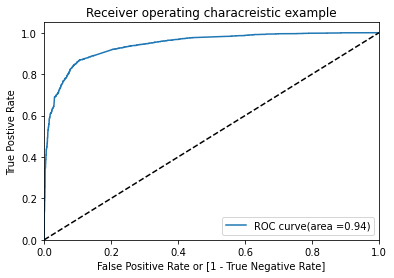

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The ROC Curve value should close to 1, getting a value of 0.94 which is a good predictive model.

In [108]:
## Finding Optimal Cutoff point

## Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.158346,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.306835,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.004250,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.958176,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.998668,7987,1,1,1,1,1,1,1,1,1,1,1


In [109]:
##Let's calculate accuracy, sensitivity and specificity

cutoff_df= pd.DataFrame (columns =['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


In [110]:
# let's take probability cutoff from 0 to 1
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi= cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.750433  0.965249  0.615877
0.2   0.2  0.814517  0.937040  0.737772
0.3   0.3  0.872776  0.881848  0.867093
0.4   0.4  0.885057  0.856500  0.902945
0.5   0.5  0.883640  0.822159  0.922151
0.6   0.6  0.875138  0.772281  0.939565
0.7   0.7  0.862069  0.706460  0.959539
0.8   0.8  0.837978  0.608749  0.981562
0.9   0.9  0.799559  0.495912  0.989757


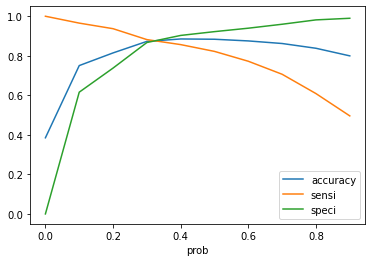

In [111]:
cutoff_df.plot.line(x='prob', y =['accuracy','sensi','speci'])
plt.show()

- from the above we can see that 0.3  to 0.4 is our cutoff so lets take it as 0.3

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.3 else 0)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.158346,3009,0,1,1,0,0,0,0,0,0,0,0,0,16
1,0,0.306835,1012,0,1,1,1,1,0,0,0,0,0,0,1,31
2,0,0.004250,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.958176,4750,1,1,1,1,1,1,1,1,1,1,1,1,96
4,1,0.998668,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [113]:
#sensitivity

TP/float(TP+FN)

0.8221586263287

In [114]:
## Specificity

TN/float(TN+FP)

0.9221510883482714

In [115]:
## Accuracy

TP/float(TP+FP)

0.868682505399568

- Observation: The above model is performing well. The ROC Curve value is 0.94, which is very good and following are the values of train data:

__Accuracy = 86.8%
  Sensitivity = 82.3%
  Specificity = 92.1%__

In [116]:
## Predicting False positive rate, positive predictive value, Negative predictive value, precision , Recall.
## False positive rate - When customer didnot convert 

print(FP/float(TN+FP))

0.07784891165172855


In [117]:
# positive predictive value

print (TP/float(TP+FP))

0.868682505399568


In [118]:
# Negative predictive value

print (TN/float(TN+FN))

0.8922200198216056


In [119]:
## Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion

array([[3386,  519],
       [ 289, 2157]], dtype=int64)

In [120]:
## Precision

# TP/TP + FP

confusion[1,1]/(confusion[0,1] + confusion[1,1])

0.8060538116591929

In [121]:
##Recall
# TP/TP+FN
confusion[1,1]/(confusion[1,0] + confusion[1,1])

0.8818479149632052

In [122]:
# Precision and recall tradeoff
# let's import library
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [123]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

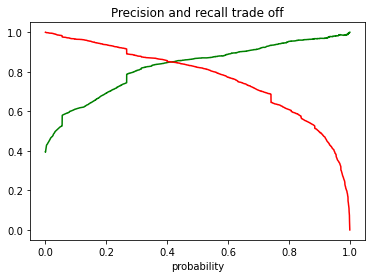

In [124]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.xlabel('probability')
plt.title('Precision and recall trade off')
plt.show()


- from the precision and Recall Trade-off curve we got cutoff 0.4 and accuracy_sensitivty_specificity we got the cutoff in between 0.3 to 0.4  
- here precision is nothing but positiv prediction rate and recall is sensitivty

# Making predictions on test Data

In [125]:
#let's look at test data
X_test.head()



,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
3271,4.0,157,4.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1490,5.0,1513,5.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7936,2.0,74,2.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4216,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,8.0,164,6.0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


- from the above x_test contains all data but we use  columns of trained data

In [126]:

X_test[['Total Time Spent on Website','TotalVisits', 'Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
3271,-0.881311,0.284772,85.910468,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1490,-0.879477,0.643547,838.844656,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7936,-0.884981,-0.432779,39.823789,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4216,-0.888650,-1.150329,-1.265540,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,-0.877642,1.719873,89.797297,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [127]:
X_test=X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_other_activity,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_other_tags,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3271,0.284772,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.643547,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,-0.432779,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,-1.150329,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3830,1.719873,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# make predictions on test da

In [129]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)



In [130]:

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.3 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()



,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.393553,1,39
1,1,1490,0.924474,1,92
2,0,7936,0.217097,0,22
3,1,4216,0.997585,1,100
4,0,3830,0.761620,1,76


In [131]:
## Confusion matrix
confusion= metrics.confusion_matrix(y_predicted_final.Converted,y_predicted_final.final_predicted)

print(confusion)


[[1408  326]
 [ 164  825]]


In [132]:
TP= confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP= confusion[0,1] # false positive
FN= confusion[1,0] # false negative

In [133]:
# accuracy of test data
print(metrics.accuracy_score(y_predicted_final.Converted,y_predicted_final.final_predicted))

0.8200514138817481


In [134]:
## Sensitivity

TP/float(TP+FN)

0.8341759352881699

In [135]:
## Specificity

TN/float(TN+FP)

0.81199538638985

In [136]:
## Precision

TP/float(TP + FP)


0.7167680278019114

for training data
__Accuracy = 86.8%
  Sensitivity = 82.3%
  Specificity = 92.1%__
for test data
__Accuracy = 81.4%
  Sensitivity = 83.4%
  Specificity = 80.2%__
### from above results we get accuracy has changed but difference is not huge so we can consider that our model is best fit 

In [137]:
#lets look at the parameter of the modal 
res.params

const                                                   0.222976
Total Time Spent on Website                             1.184954
Lead Origin_Landing Page Submission                    -0.710848
Lead Origin_Lead Import                                 1.762924
Lead Source_Olark Chat                                  0.814228
Lead Source_Reference                                   3.258464
Lead Source_Welingak Website                            4.878087
Last Activity_Email Bounced                            -1.312892
Last Activity_SMS Sent                                  2.060717
Last Activity_Unreachable                               1.451032
Last Activity_other_activity                            1.063744
Specialization_Finance Management                      -0.604304
What is your current occupation_Unemployed             -0.388514
What is your current occupation_Working Professional    2.230041
Tags_Closed by Horizzon                                 5.733438
Tags_Graduation in progre

#### conclusion
- from the above we can tell that some coefficients positively related and some coefficients negatively related
- Tags_Lost to EINS,Tags_Closed by Horizzon these to are strongly related to the converting probability but these are dummy variables from tag's categorical column. so Tag's can be the important feaure to predict converting probability
- similarly Lead source and what is your current occupation also have most contribution towards the converting probability
- final model has Precision of 0.7069, this means 70.69% of predicted hot leads are True Hot Leads.
- final model has Sensitivity of 0.83 , this means it predicts 83% customers out of all the converted  correctly
